<a href="https://colab.research.google.com/github/rufimelo99/UltimatumGame/blob/main/UltimatumGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import random
import numpy as np
import numpy.random as rnd
import math

class Player:
    def __init__(self, id, Neigbours) -> None:
        self.id=id
        self.bargainValues=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        self.mapValuesIndex = {0: 0, 0.1: 1, 0.2: 2, 0.3: 3, 0.4:4, 0.5: 5, 0.6: 6, 0.7: 7, 0.8: 8, 0.9: 9, 1: 1}
        self.mapIndexValues = {0: 0, 1: 0.1, 2: 0.2, 3: 0.3, 4:0.4, 5: 0.5, 6: 0.6, 7: 0.7, 8: 0.8, 9: 0.9, 1: 1}
        self.neighbours=[]
        self.AvgComulativePayoff=0
        self.qinitProposer = np.zeros((len(self.bargainValues), 2))
        self.qinitCorrespondent = np.zeros((len(self.bargainValues), 2))
        
        """
                #payoff per bargain value-> either accept or not
        Qinit = [0  0
                0   0
                0   0
                .
                .
                .        ]
        """        

    def qlearningIterationProposer(self, bargainAccepted, bargainIndexOnTable):
        #bargainAccepted: 0 or 1 which also works as position in the qinit
        
        action = bargainAccepted

        self.qinitProposer[bargainIndexOnTable][action] += 0.3*(self.bargainValues[bargainIndexOnTable]*bargainAccepted + 0.9 * np.max(self.qinitProposer[bargainIndexOnTable]) - self.qinitProposer[bargainIndexOnTable][action])

    def qlearningIterationCorrespondent(self, bargainAccepted, bargainIndexOnTable):
        #bargainAccepted: 0 or 1 which also works as position in the qinit
        
        action = bargainAccepted

        self.qinitProposer[bargainIndexOnTable][action] += 0.3*(self.bargainValues[bargainIndexOnTable]*bargainAccepted + 0.9 * np.max(self.qinitProposer[bargainIndexOnTable])  - self.qinitProposer[bargainIndexOnTable][action])

    def makeOffer(self):
        #returns index of bargain proposal 
        #offer from Proposer

        #yes or no
        #print(self.qinit)
        #print(self.qinit[:,1])
        #print(np.where(self.qinit[:,1] == np.max(self.qinit[:,1]))[0])
        bargainValueIndexRandom = rnd.choice(len(self.bargainValues))
        bargainValueIndex = rnd.choice(np.where(self.qinitProposer[:,1] == np.max(self.qinitProposer[:,1]))[0])     #offer what is best for himself according to its policy
        
        
        index = rnd.choice([bargainValueIndexRandom, bargainValueIndex], p = [0.15, 0.85])

        
        #print("\nPlayer " + str(self.id) +" made offer of: "+str(self.bargainValues[index]))
        return index

    def bargainDecision(self, bargainValueIndex):
        #print("Proposer reward in question: "+str(self.bargainValues[bargainValueIndex]))
        #print("Correspondent reward in question: "+str(self.bargainValues[-(bargainValueIndex+1)]))
        
        correspondentValueIndex = self.bargainValues.index(self.bargainValues[-(bargainValueIndex+1)])
        #print("Correspondent index: "+str(correspondentValueIndex))

        #yes or no
        #model if there was more option other than accepting and rejecting
        #print(self.qinit[reward])
        aux = rnd.choice(2)     #len of options        
        aux1 = rnd.choice(np.where(self.qinitCorrespondent[correspondentValueIndex] == np.max(self.qinitCorrespondent[correspondentValueIndex]))[0])    #most profitable choice
        
        #print("aux: "+str(aux))
        #print("aux1: "+str(aux1))


        index = rnd.choice([aux, aux1], p = [0.15, 0.85])

        #TODO
        #? is the index correct with 0/1
        #print("\nPlayer " + str(self.id) +" made the decision of "+ str(index)+" (accepting/rejecting) on the offer of reciving: "+str(self.bargainValues[-(bargainValueIndex+1)]))
        
        return index, correspondentValueIndex

        



In [160]:
import networkx as nx
import matplotlib.pyplot as plt
"""
TODO
setup game first with random
we want a random generated graphs
we want to train individuals

"""
class ultimatumGame:
    def __init__(self, Nplayers) -> None:
        self.graph = nx.erdos_renyi_graph(Nplayers, 0.15)
        self.Players = {}

    def printGraph(self):
        #nx.draw_shell(self.graph, with_labels = True)
        #nx.draw(self.graph, with_labels = True)
        
        fig = plt.figure(figsize=(40, 40)) 
        nx.draw(self.graph, node_size=70) 
        plt.axis('equal') 
        plt.show() 
        #fig.savefig('waka.svg') 
        plt.show()

    

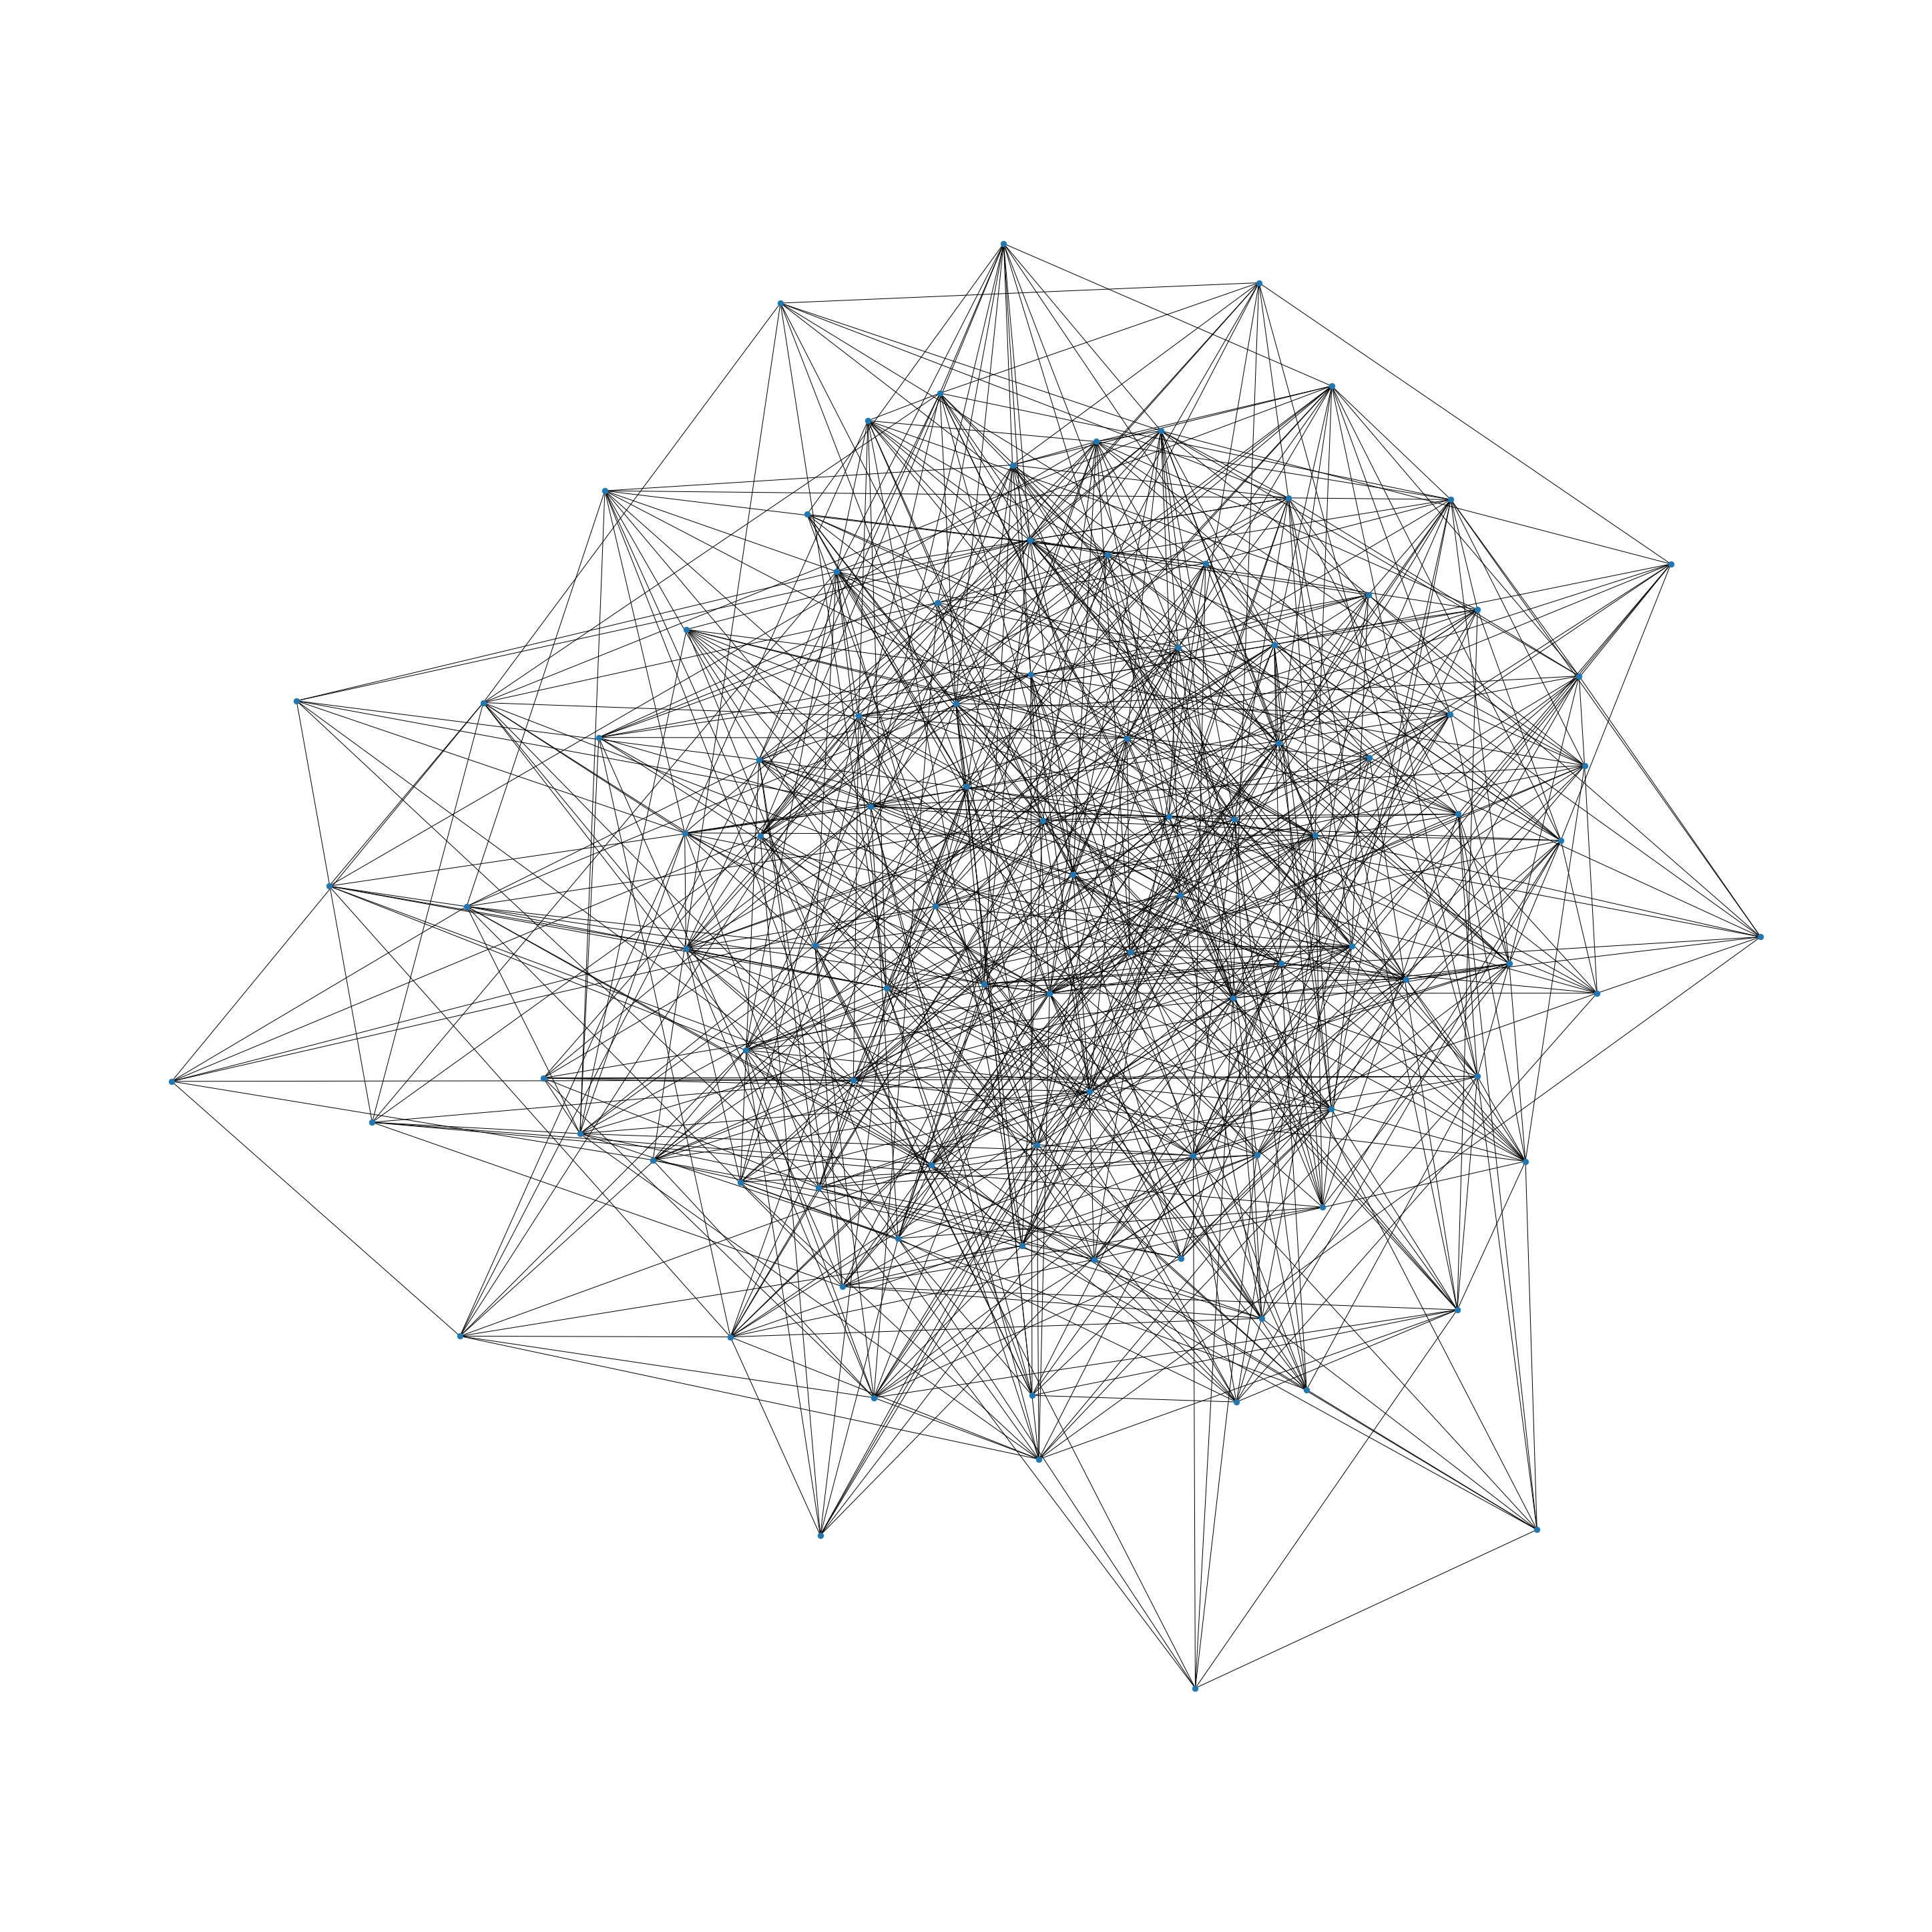

In [161]:
NPLAYERS = 100

game = ultimatumGame(NPLAYERS)

game.printGraph()

#create all players
for i in range(NPLAYERS):
    player = Player(i, list(game.graph.adj[i]))
    player.neighbours = list(game.graph.adj[i])
    game.Players[i]=player


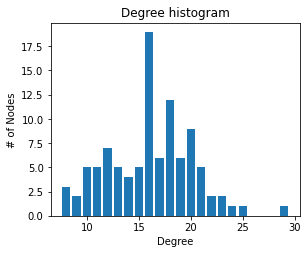

In [162]:
degree_sequence = sorted([d for n, d in game.graph.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

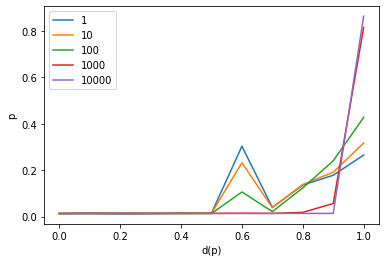

In [165]:
NITERATIONS = 10001

offersDicInitial={0:0, 0.1:0, 0.2:0, 0.3:0, 0.4:0, 0.5:0, 0.6:0, 0.7:0, 0.8:0, 0.9:0, 1:0}
offerDic = {}
stopsForGraphs = [1,10,100,1000,10000]


for i in range(NITERATIONS):
  #print("Iteration: "+str(i))
  for playerId in range(len(game.Players)):
    for neighbourId in game.Players[playerId].neighbours:
      player = game.Players[playerId]
      neighbour = game.Players[neighbourId]
      playerBargainIndex=player.makeOffer()
      rewardAcceptedOrNot, neighbourBargainIndex = neighbour.bargainDecision(playerBargainIndex)
      player.qlearningIterationProposer(rewardAcceptedOrNot, playerBargainIndex)
      neighbour.qlearningIterationCorrespondent(rewardAcceptedOrNot, neighbourBargainIndex)

      #print("player.bargainValues[playerBargainIndex]: "+str(player.bargainValues[playerBargainIndex]))
      #print("offersDicInitial player.bargainValues[playerBargainIndex]: "+str(offersDicInitial[player.bargainValues[playerBargainIndex]]))
      offersDicInitial[player.bargainValues[playerBargainIndex]]+=1
      

  if i in stopsForGraphs:
    offerDic[i]=offersDicInitial.copy()
    offersDicInitial.update({}.fromkeys(offersDicInitial,0))
    

plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], np.array(list(offerDic[1].values())) /sum(np.array(list(offerDic[1].values()))) , label = "1" ) 
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], np.array(list(offerDic[10].values()))/sum(np.array(list(offerDic[10].values()))), label = "10")
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], np.array(list(offerDic[100].values()))/sum(np.array(list(offerDic[100].values()))), label = "100")
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], np.array(list(offerDic[1000].values()))/sum(np.array(list(offerDic[1000].values()))), label = "1000")
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], np.array(list(offerDic[10000].values()))/sum(np.array(list(offerDic[10000].values()))), label = "10000")


# naming the x axis
plt.xlabel('d(p)')
# naming the y axis
plt.ylabel('p')
# show a legend on the plot
plt.legend()
plt.show()

In [41]:
for playerId in range(len(game.Players)):
  player = game.Players[playerId]
  print(player.qinitProposer)
  print("qinitProposer")
for playerId in range(len(game.Players)):
  player = game.Players[playerId]
  print("qinitCorrespondent")
  print(player.qinitCorrespondent)

[[0.00000000e+00 0.00000000e+00]
 [8.10000000e-03 2.84698597e-01]
 [0.00000000e+00 6.12315278e-01]
 [3.27380904e-01 1.26614621e+00]
 [5.97851551e-01 1.30789164e+00]
 [0.00000000e+00 1.31287937e+00]
 [0.00000000e+00 1.70819158e+00]
 [3.93872211e-01 1.83803111e+00]
 [3.05134504e-01 1.91815153e+00]
 [4.05878028e-01 2.56228737e+00]
 [8.99992364e+00 9.99992168e+00]]
qinitProposer
[[0.         0.        ]
 [0.         0.40417396]
 [0.22790632 0.84409747]
 [2.69999993 3.        ]
 [0.30747448 1.30789164]
 [0.67064783 2.02086978]
 [0.         2.42504374]
 [1.03131032 2.56724168]
 [0.51790091 3.08597077]
 [8.0989538  8.99981878]
 [1.10614575 1.67027995]]
qinitProposer
[[0.         0.        ]
 [0.08828269 0.50369359]
 [0.15373724 0.87877455]
 [0.28120262 1.59907588]
 [3.6        4.        ]
 [0.         1.73581861]
 [0.64248437 2.53229242]
 [0.111699   2.95434116]
 [0.74060116 3.7801559 ]
 [1.50291686 3.95448548]
 [1.29454943 2.16256641]]
qinitProposer
[[0.         0.        ]
 [0.33030331 0.56